# Demonstration 2: Linear Regression with Gradient Descent in Python

**1. Import Modules**  
The first step is always to import all the necessary libraries.  
We need a library for matrix computation and a library to make fancy graphs  
Furthermore, we'll use a library for 3D plots. This makes it easier to explore the  error surface  

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib           import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D

**2.  Define helper functions**  
let's define all necessary functions right away! 

In [0]:
def generateData(thetas,x,sigma):
  # generate some data by adding gaussian noise (sigma) to a 
  # linear function of x, parametrised by theta  
  return linearFunction(x,thetas)+(sigma*np.random.randn(x.shape[0])+0)

  
def linearFunction(x,thetas):
  # defines a simple linear function - the line we're going to fit    
  return thetas[0] + thetas[1]*x

def lossFunction(y_true,y_hat):
  # squared euclidean loss
  loss = np.mean([error**2 for error in (y_true-y_hat)])
  return loss

def lossGradient(x,y_true,y_hat):      
  # compute the gradient of the loss function wrt to the weights
  # as vector of partial derivates (for intercept and slope)
  gradIntercept =   -2*np.mean((y_true-y_hat))
  gradSlope     = -2*np.mean(x*(y_true-y_hat))  
  gradients = np.array([gradIntercept,gradSlope])
  return gradients

def runGD(x,y_true,thetas,epsilon,numIters):
  # performs gradient descent on data  
  losses    = np.empty((numIters))
  thetaHats = np.empty((numIters,2))
  for ii in range(numIters):
    # get predictions with current parameter value
    y_hat = linearFunction(x,thetas)
    # store intermediate results:
    losses[ii] = lossFunction(y_true,y_hat)
    thetaHats[ii,:] = thetas
    # compute gradients (on whole dataset)
    gradients = lossGradient(x,y_true,y_hat)
    # update parameters  
    thetas = thetas-epsilon*gradients   
    
  return losses,thetaHats
  


**3. Generate and visualise some toy data**  
Let's first generate some toy data and display it as scatter plot!

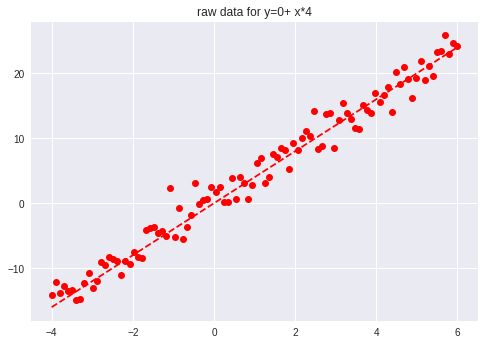

In [13]:
# define parameters
xRange   = [-4,6]
noiseVar = 2
thetas   = [0,4]

# generate data
x      = np.linspace(xRange[0],xRange[1],100)
y      = linearFunction(x,thetas)
yNoisy = generateData(thetas,x,noiseVar)

# display data
plt.plot(x,y,'--',color='red')
plt.plot(x,yNoisy,'o',color='red')  
plt.xlabel = 'x'
plt.ylabel = 'y'
plt.title('raw data for y=' + str(thetas[0]) +'+ x*' + str(thetas[1]))
plt.show()



** 4. Explore the surface of the loss function **  
Next, we're going to plot the loss function of the linear model and the data above for different values of theta.
This is a bit like "qualitative" exhaustive search - we display the loss for each combination of the slope and intercept parameters within a sensible range

In [0]:
intercepts = np.linspace(thetas[0]-3,thetas[0]+3,100)
slopes     = np.linspace(thetas[1]-3,thetas[1]+3,100)
[i,s]      = np.meshgrid(intercepts,slopes)
loss       = np.empty((100,100))
for ii,intercept in enumerate(intercepts):
  for ss,slope in enumerate(slopes):
    loss[ii,ss] = lossFunction(yNoisy,linearFunction(x,[intercept,slope]))
    
    
  


Text(0.5,0,'loss')

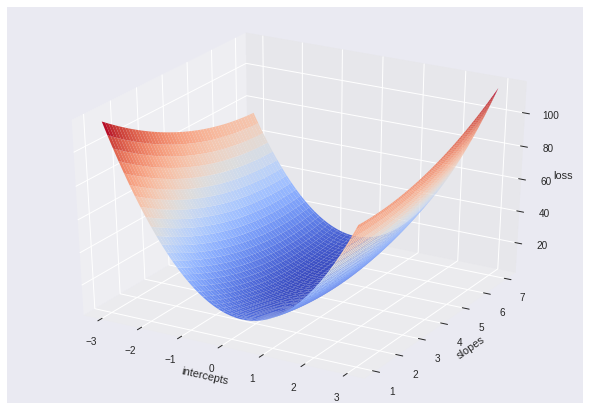

In [15]:
# 1. surface plot
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(i,s,loss,cmap=cm.coolwarm)
# ax.contour3D(i,s,loss,100,cmap=cm.coolwarm)
ax.set_xlabel('intercepts')
ax.set_ylabel('slopes')
ax.set_zlabel('loss')

Text(0,0.5,'slopes')

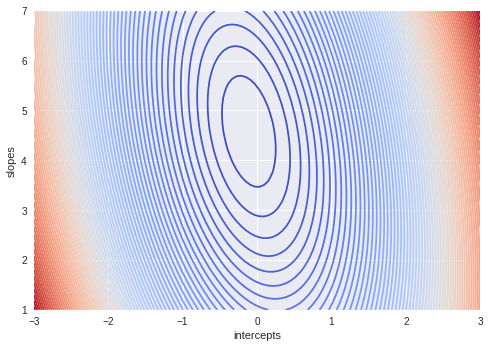

In [16]:
# 2. contour plot
fig = plt.figure()
ax = fig.gca()
ax.contour(i,s,loss,100,cmap=cm.coolwarm)
ax.set_xlabel('intercepts')
ax.set_ylabel('slopes')

**5. Perform Gradient Descent **  
Ok let's perform gradient descent and plot the results! 

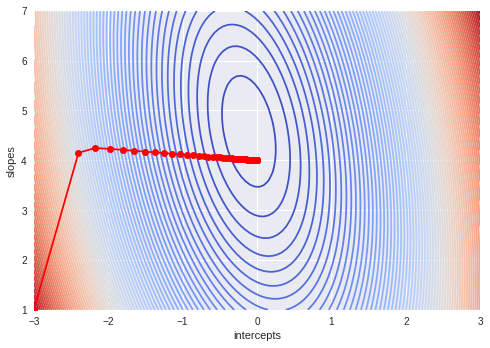

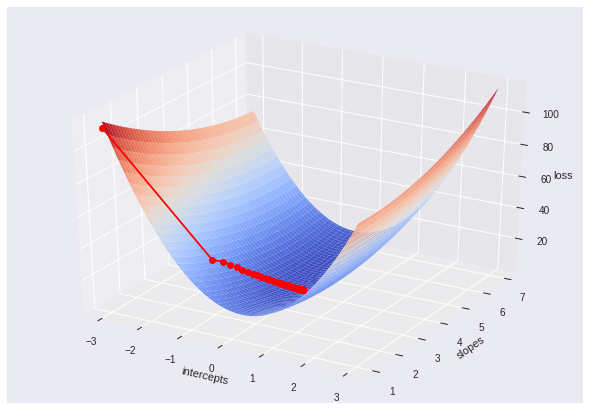

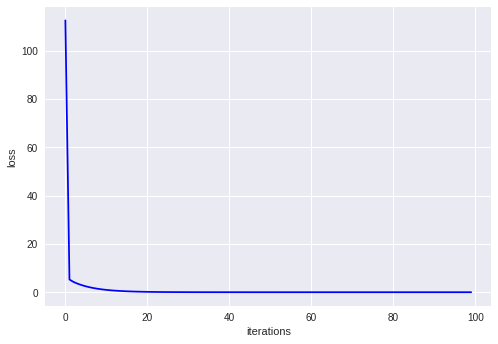

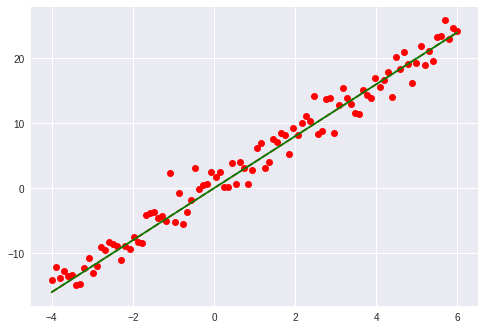

In [17]:
# parameters
epsilon = 0.05
numIters = 100

# initial guesses for the thetas 
# note: we usually use random initialisation, this here
# is for illustration purposes
thetas = np.array([-3,1])


# let's go!
lossVect = np.empty(numIters)
thetaVect = np.empty((numIters,2))
lossVect,thetaVect = runGD(x,y,thetas,epsilon,numIters)

# plot results (contour)
fig = plt.figure()
ax = fig.gca()
ax.contour(i,s,loss,100,cmap=cm.coolwarm)
ax.plot(thetaVect[:,0],thetaVect[:,1],'-o',color='red')
ax.set_xlabel('intercepts')
ax.set_ylabel('slopes')

# plot results (surface)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(i,s,loss,cmap=cm.coolwarm)
ax.plot3D(thetaVect[:,0],thetaVect[:,1],lossVect,'-o',color='red')
ax.set_xlabel('intercepts')
ax.set_ylabel('slopes')
ax.set_zlabel('loss')

# plot loss function
fig = plt.figure()
ax = fig.gca()
ax.plot(np.arange(numIters),lossVect,'-',color='blue')
ax.set_xlabel('iterations')
ax.set_ylabel('loss')

# show fitted function
fig = plt.figure()
ax = fig.gca()
ax.plot(x,y,'--',color='red')
ax.plot(x,yNoisy,'o',color='red') 
ax.plot(x,linearFunction(x,thetaVect[-1,:]),'-',color='green')
